Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


base_url = "https://api.citybik.es/v2/networks"
network_id = "bixi-toronto"  


stations_url = f"{base_url}/{network_id}"


response = requests.get(stations_url)
data = response.json()


stations = data['network']['stations']

# Create a DataFrame for bike stations
df_bike_stations = pd.DataFrame(stations)
df_bike_stations = df_bike_stations[['name', 'latitude', 'longitude', 'free_bikes']]
df_bike_stations.columns = ['Station Name', 'Latitude', 'Longitude', 'Number of Bikes']


url = "https://api.foursquare.com/v3/places/search"
headers = {
    "Authorization": "fsq3M2UiR2UrdKqjVmnmrIAeWfvdg5chQ5UpEzWV0EihdOk=", 
    "accept": "application/json"
}

# Define parameters for different venues
params = {
    'll': '43.653226,-79.3831843',  
    'radius': 1000, 
    'limit': 10
}

# Fetch data for restaurants, bars, and basketball courts
def fetch_venue_data(query):
    params['query'] = query
    response = requests.get(url, headers=headers, params=params)
    return response.json()

data_restaurants = fetch_venue_data('restaurant')
data_bars = fetch_venue_data('bar')
data_basketball_courts = fetch_venue_data('basketball court')


def extract_venues(data, query):
    venues = data.get('results', [])
    return pd.DataFrame([{
        'Name': venue.get('name'),
        'Latitude': venue.get('geocodes', {}).get('main', {}).get('latitude'),
        'Longitude': venue.get('geocodes', {}).get('main', {}).get('longitude'),
        'Category': venue.get('categories', [{}])[0].get('name'),
        'Search Query': query
    } for venue in venues])

# Create DataFrames for different venues
df_restaurants = extract_venues(data_restaurants, 'Restaurant')
df_bars = extract_venues(data_bars, 'Bar')
df_basketball_courts = extract_venues(data_basketball_courts, 'Basketball Court')


df_all = pd.concat([df_restaurants, df_bars, df_basketball_courts], ignore_index=True)

# Display the combined DataFrame
print(df_all)




                                       Name   Latitude  Longitude  \
0         Eggspectation Bell Trinity Square  43.653268 -79.382074   
1                        Trattoria Mercatto  43.654458 -79.381142   
2                  John & Sons Oyster House  43.650598 -79.381743   
3                          Leña Restaurante  43.651907 -79.379941   
4                     Gyubee Japanese Grill  43.655187 -79.385793   
5                         JOEY Eaton Centre  43.655861 -79.381926   
6                  The Keg Steakhouse + Bar  43.650038 -79.384038   
7                          Richmond Station  43.651510 -79.379223   
8                                 Rosalinda  43.650207 -79.384813   
9                      Paramount Fine Foods  43.655035 -79.380158   
10                      Bar+ Karaoke Lounge  43.658218 -79.381927   
11                           Bar Hop Brewco  43.649093 -79.393190   
12                     Earl's Kitchen & Bar  43.648073 -79.384052   
13                              Li

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

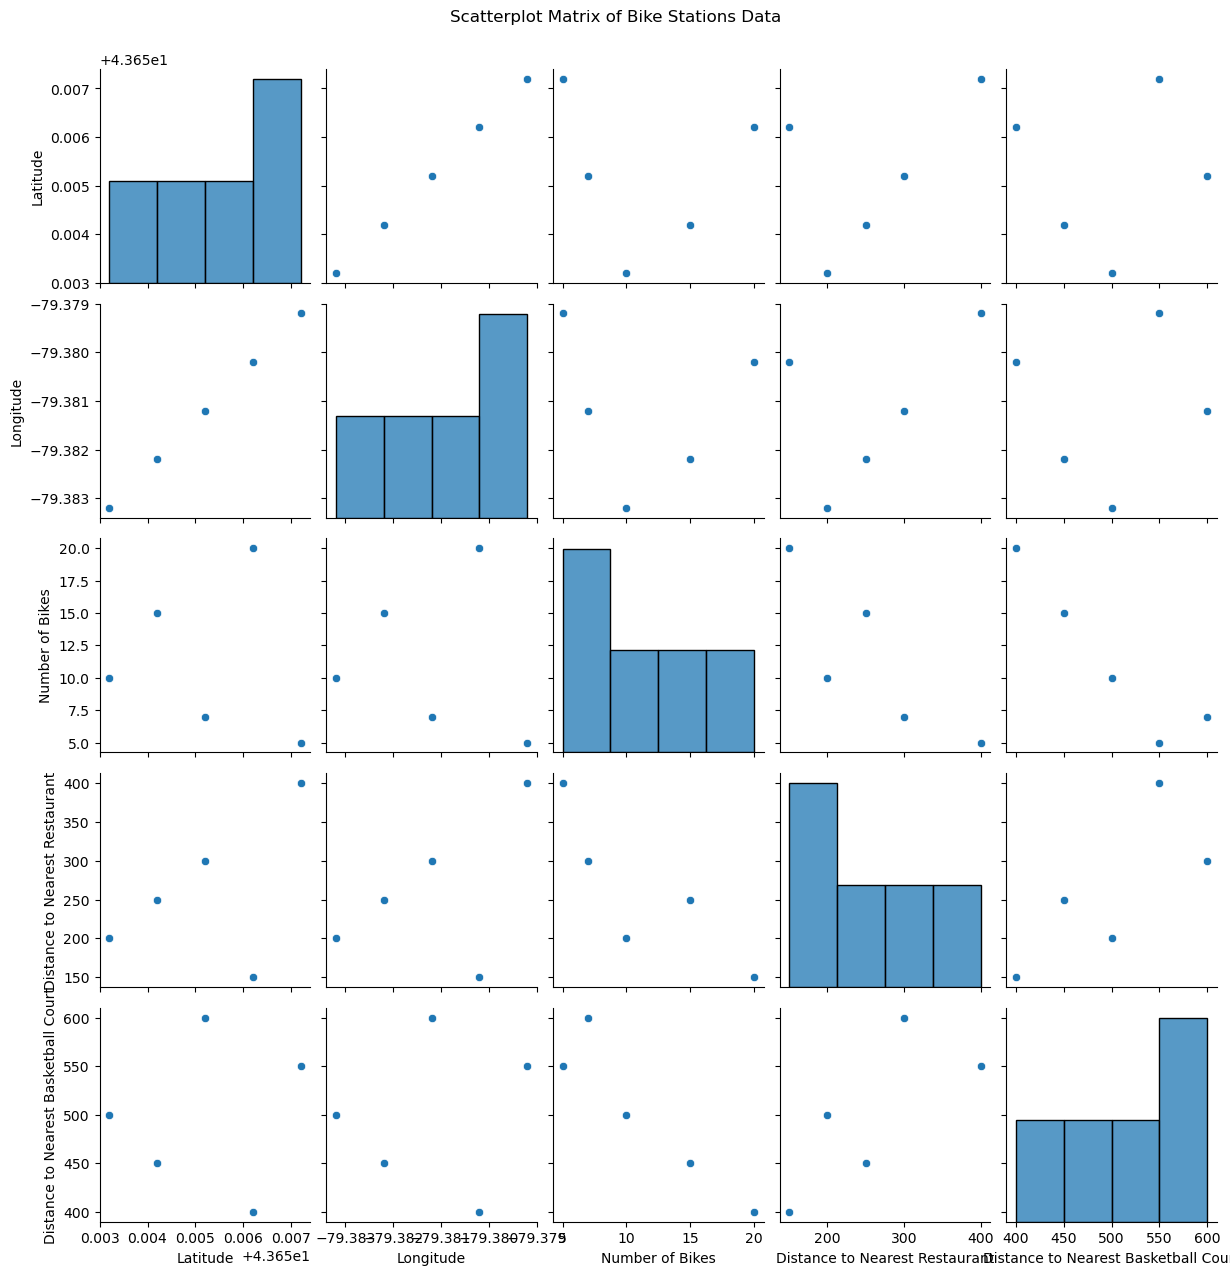

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'Latitude': [43.6532, 43.6542, 43.6552, 43.6562, 43.6572],
    'Longitude': [-79.3832, -79.3822, -79.3812, -79.3802, -79.3792],
    'Number of Bikes': [10, 15, 7, 20, 5],
    'Distance to Nearest Restaurant': [200, 250, 300, 150, 400],  
    'Distance to Nearest Basketball Court': [500, 450, 600, 400, 550]  
}

df = pd.DataFrame(data)

# Plot the scatterplot matrix
sns.pairplot(df)
plt.suptitle('Scatterplot Matrix of Bike Stations Data', y=1.02)
plt.show()


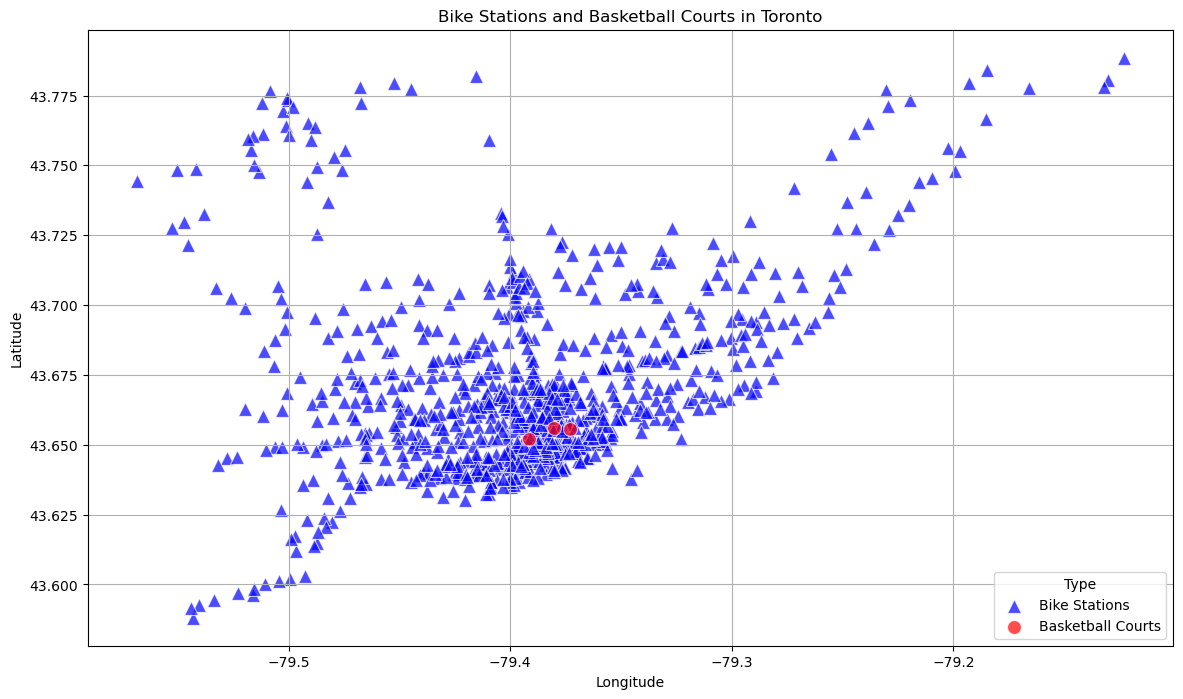

In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


base_url = "https://api.citybik.es/v2/networks"
network_id = "bixi-toronto" 
stations_url = f"{base_url}/{network_id}"

response = requests.get(stations_url)
data = response.json()
stations = data['network']['stations']

df_bike_stations = pd.DataFrame(stations)
df_bike_stations = df_bike_stations[['name', 'latitude', 'longitude', 'free_bikes']]
df_bike_stations.columns = ['Station Name', 'Latitude', 'Longitude', 'Number of Bikes']

# Fetch Basketball Court Data
url = "https://api.foursquare.com/v3/places/search"
headers = {
    "Authorization": "fsq3M2UiR2UrdKqjVmnmrIAeWfvdg5chQ5UpEzWV0EihdOk=",  
    "accept": "application/json"
}
params_basketball_courts = {
    'll': '43.653226,-79.3831843',  
    'radius': 1000,  
    'query': 'basketball court',
    'limit': 10
}
response_basketball_courts = requests.get(url, headers=headers, params=params_basketball_courts)
data_basketball_courts = response_basketball_courts.json()

def extract_venues(data, query):
    venues = data.get('results', [])
    return pd.DataFrame([{
        'Name': venue.get('name'),
        'Latitude': venue.get('geocodes', {}).get('main', {}).get('latitude'),
        'Longitude': venue.get('geocodes', {}).get('main', {}).get('longitude'),
        'Category': venue.get('categories', [{}])[0].get('name'),
        'Search Query': query
    } for venue in venues])

df_basketball_courts = extract_venues(data_basketball_courts, 'Basketball Court')

# Create scatter plots for bike stations and basketball courts
plt.figure(figsize=(14, 8))


sns.scatterplot(data=df_bike_stations, x='Longitude', y='Latitude',
                label='Bike Stations', color='blue', marker='^', s=100, alpha=0.7)


sns.scatterplot(data=df_basketball_courts, x='Longitude', y='Latitude',
                label='Basketball Courts', color='red', marker='o', s=100, alpha=0.7)

plt.title('Bike Stations and Basketball Courts in Toronto')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Type')
plt.grid(True)
plt.show()


#Proximity Analysis:Density of Bike Stations vs. Basketball Courts:By plotting both types of locations, you can observe how closely these two types of POIs are situated relative to each other. 
#If bike stations are densely concentrated in certain areas, it may indicate high pedestrian or bike traffic areas which could correlate with the presence of basketball courts



# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [13]:
import sqlite3
import requests
import pandas as pd
import os


directory = 'data'
db_file = os.path.join(directory, 'toronto_pois.db')


if not os.path.exists(directory):
    os.makedirs(directory)


conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Create tables
cursor.execute('''
    CREATE TABLE IF NOT EXISTS BikeStations (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT,
        latitude REAL,
        longitude REAL,
        free_bikes INTEGER
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS BasketballCourts (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT,
        latitude REAL,
        longitude REAL,
        category TEXT
    )
''')

# Fetch and insert Bike Stations data
base_url = "https://api.citybik.es/v2/networks"
network_id = "bixi-toronto"
stations_url = f"{base_url}/{network_id}"

response = requests.get(stations_url)
data = response.json()
stations = data['network']['stations']

df_bike_stations = pd.DataFrame(stations)
df_bike_stations = df_bike_stations[['name', 'latitude', 'longitude', 'free_bikes']]
df_bike_stations.columns = ['name', 'latitude', 'longitude', 'free_bikes']

# Insert Bike Stations data into the database
df_bike_stations.to_sql('BikeStations', conn, if_exists='append', index=False)

# Fetch and insert Basketball Courts data
url = "https://api.foursquare.com/v3/places/search"
headers = {
    "Authorization": "fsq3M2UiR2UrdKqjVmnmrIAeWfvdg5chQ5UpEzWV0EihdOk=",  
    "accept": "application/json"
}
params_basketball_courts = {
    'll': '43.653226,-79.3831843',  # Latitude and Longitude for Toronto
    'radius': 1000,  
    'query': 'basketball court',
    'limit': 10
}
response_basketball_courts = requests.get(url, headers=headers, params=params_basketball_courts)
data_basketball_courts = response_basketball_courts.json()

def extract_venues(data, query):
    venues = data.get('results', [])
    return pd.DataFrame([{
        'name': venue.get('name'),
        'latitude': venue.get('geocodes', {}).get('main', {}).get('latitude'),
        'longitude': venue.get('geocodes', {}).get('main', {}).get('longitude'),
        'category': venue.get('categories', [{}])[0].get('name'),
    } for venue in venues])

df_basketball_courts = extract_venues(data_basketball_courts, 'Basketball Court')

# Insert Basketball Courts data into the database
df_basketball_courts.to_sql('BasketballCourts', conn, if_exists='append', index=False)


conn.commit()
conn.close()

print("Data has been successfully stored in the SQLite database.")


Data has been successfully stored in the SQLite database.


Look at the data before and after the join to validate your data.

In [17]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('data/toronto_pois.db')


query_bike_stations = "SELECT * FROM BikeStations"
df_bike_stations = pd.read_sql_query(query_bike_stations, conn)


print("Bike Stations Data:")
print(df_bike_stations.head())


conn.close()



conn = sqlite3.connect('data/toronto_pois.db')

# Fetch data from BasketballCourts table
query_basketball_courts = "SELECT * FROM BasketballCourts"
df_basketball_courts = pd.read_sql_query(query_basketball_courts, conn)

# Display the first few rows of the BasketballCourts DataFrame
print("Basketball Courts Data:")
print(df_basketball_courts.head())


conn.close()


import sqlite3
import pandas as pd
from geopy.distance import great_circle


conn = sqlite3.connect('data/toronto_pois.db')


df_bike_stations = pd.read_sql_query("SELECT * FROM BikeStations", conn)


df_basketball_courts = pd.read_sql_query("SELECT * FROM BasketballCourts", conn)


conn.close()

# Define a function to find nearby basketball courts
def find_nearby_basketball_courts(bike_stations, basketball_courts, radius=1000):
    results = []
    for _, bike_station in bike_stations.iterrows():
        bike_location = (bike_station['latitude'], bike_station['longitude'])
        for _, court in basketball_courts.iterrows():
            court_location = (court['latitude'], court['longitude'])
            distance = great_circle(bike_location, court_location).meters
            if distance <= radius:
                results.append({
                    'Station Name': bike_station['name'],
                    'Basketball Court Name': court['name'],
                    'Station Latitude': bike_station['latitude'],
                    'Station Longitude': bike_station['longitude'],
                    'Court Latitude': court['latitude'],
                    'Court Longitude': court['longitude'],
                    'Distance (meters)': distance
                })
    return pd.DataFrame(results)


df_nearby_basketball_courts = find_nearby_basketball_courts(df_bike_stations, df_basketball_courts)

# Display the joined DataFrame
print("Nearby Basketball Courts:")
print(df_nearby_basketball_courts.head())


Bike Stations Data:
   id                         name   latitude  longitude  free_bikes
0   1    Queen St E / Woodward Ave  43.665269 -79.319796          16
1   2  Primrose Ave / Davenport Rd  43.671420 -79.445947           0
2   3      Queen St E / Rhodes Ave  43.666224 -79.317693          11
3   4         Bond St / Queen St E  43.653236 -79.376716           0
4   5     Church St / Alexander St  43.663722 -79.380288          14
Basketball Courts Data:
   id                                     name   latitude  longitude  \
0   1                          NBA Jam Session  43.656040 -79.380224   
1   2               Moss Park Baseball Diamond  43.655668 -79.372965   
2   3  University Settlement Recreation Centre  43.651925 -79.391304   

           category  
0  Basketball Court  
1    Baseball Field  
2      Music School  
Nearby Basketball Courts:
                                Station Name  \
0                       Bond St / Queen St E   
1                       Bond St / Queen St 